In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [10]:
dataset=pd.read_csv(r"C:\Users\Shubham Pandey\Downloads\House Prices.csv")
dataset.head(3)

,ID,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,Condition,Grade,Sqft_above,Sqft_basement,Yr_built,Yr_renovated,zipcode,Lat,Long,Sqft_living15,Sqft_lot15
0,1,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
1,2,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
2,3,647500.0,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891


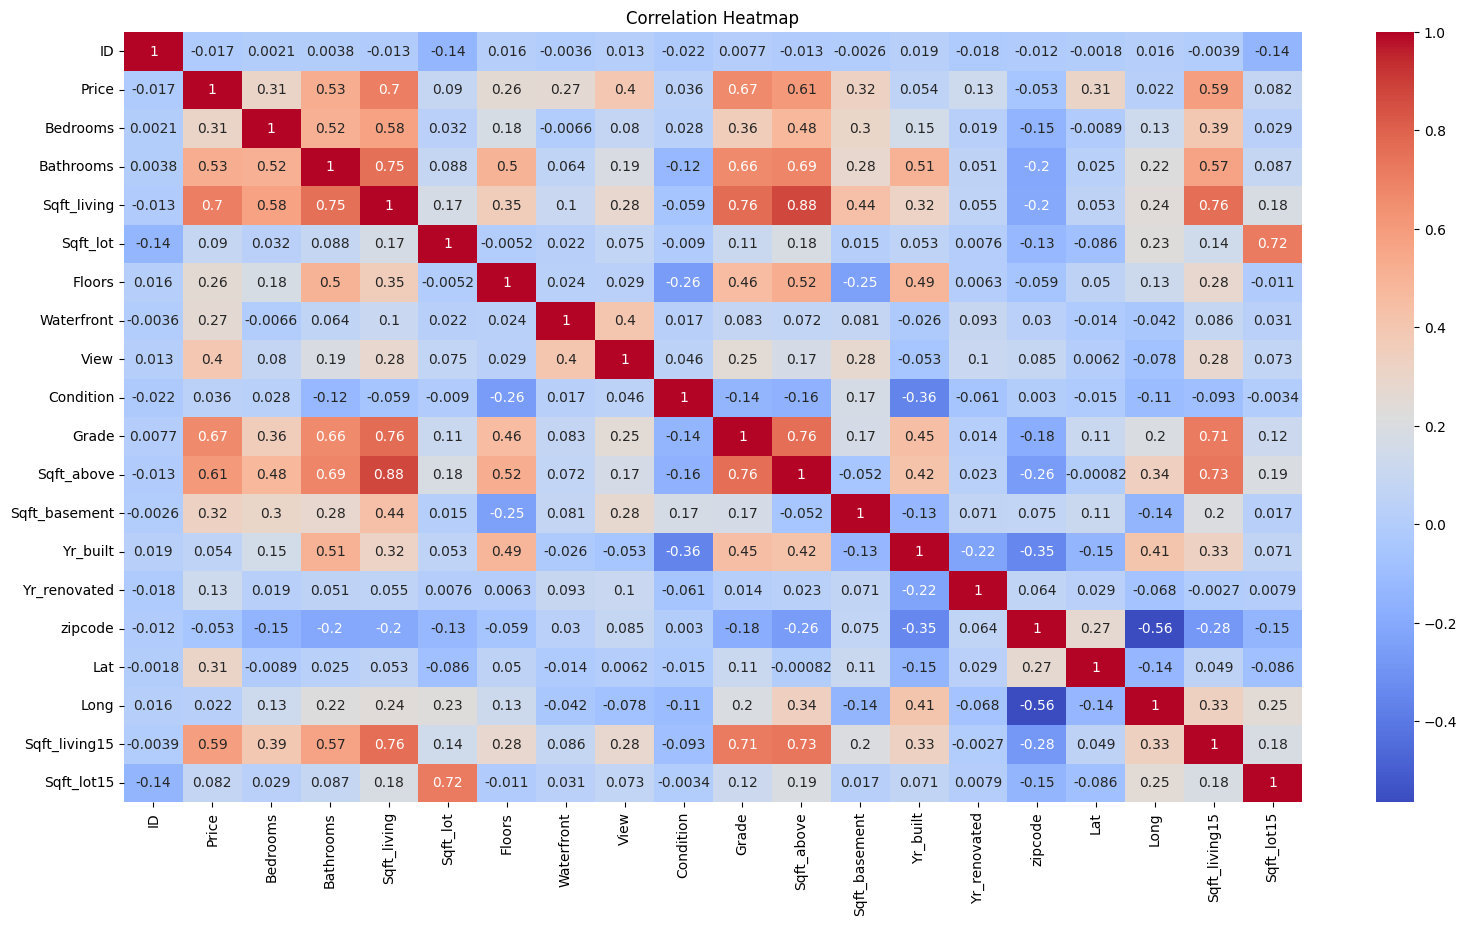

In [11]:
plt.figure(figsize=(19,10))
sns.heatmap(data=dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [12]:
x=dataset.iloc[:,:-1]
y=dataset["Price"]

In [13]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [14]:
x_train, x_test,y_train, y_test= train_test_split(x,y,test_size=0.2 , random_state=43)

In [15]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [16]:
lr= LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test,y_test)*100

100.0

In [17]:
lr.coef_

array([-1.15172850e-10,  3.67353733e+05,  2.69178150e-11, -2.35017173e-11,
        1.25411173e-10,  2.31997077e-11, -1.07971125e-11,  2.17376881e-11,
       -7.92569769e-12,  6.37190462e-11,  9.24368945e-13, -3.32612669e-12,
        8.01492136e-12, -1.32935127e-10,  1.52092144e-10, -2.74353529e-11,
        7.53862794e-12, -8.00355338e-11, -2.54658516e-11])

Text(0, 0.5, 'coefficients')

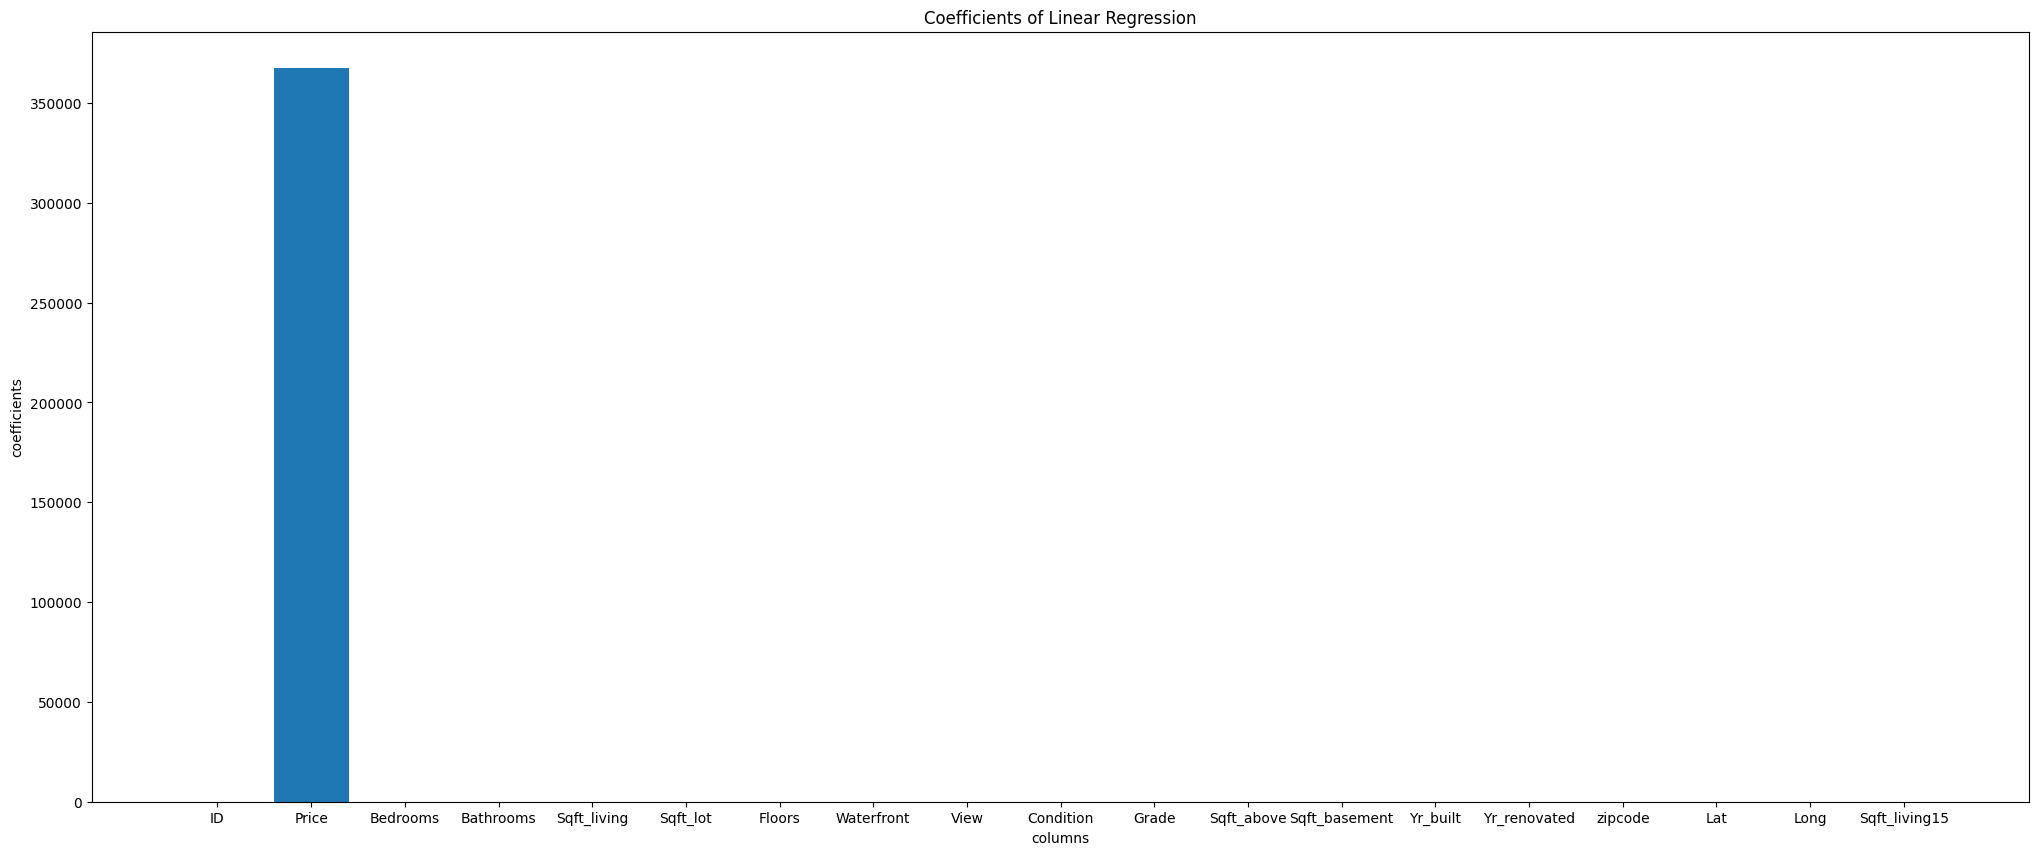

In [18]:
plt.figure(figsize=(25,10))
plt.bar(x.columns, lr.coef_)
plt.title('Coefficients of Linear Regression')
plt.xlabel("columns")
plt.ylabel("coefficients")

lasso

In [19]:
la=  Lasso(alpha=1.0)
la.fit(x_train,y_train)
la.score(x_test,y_test)

0.9999999956761231

Text(0.5, 1.0, 'lasso')

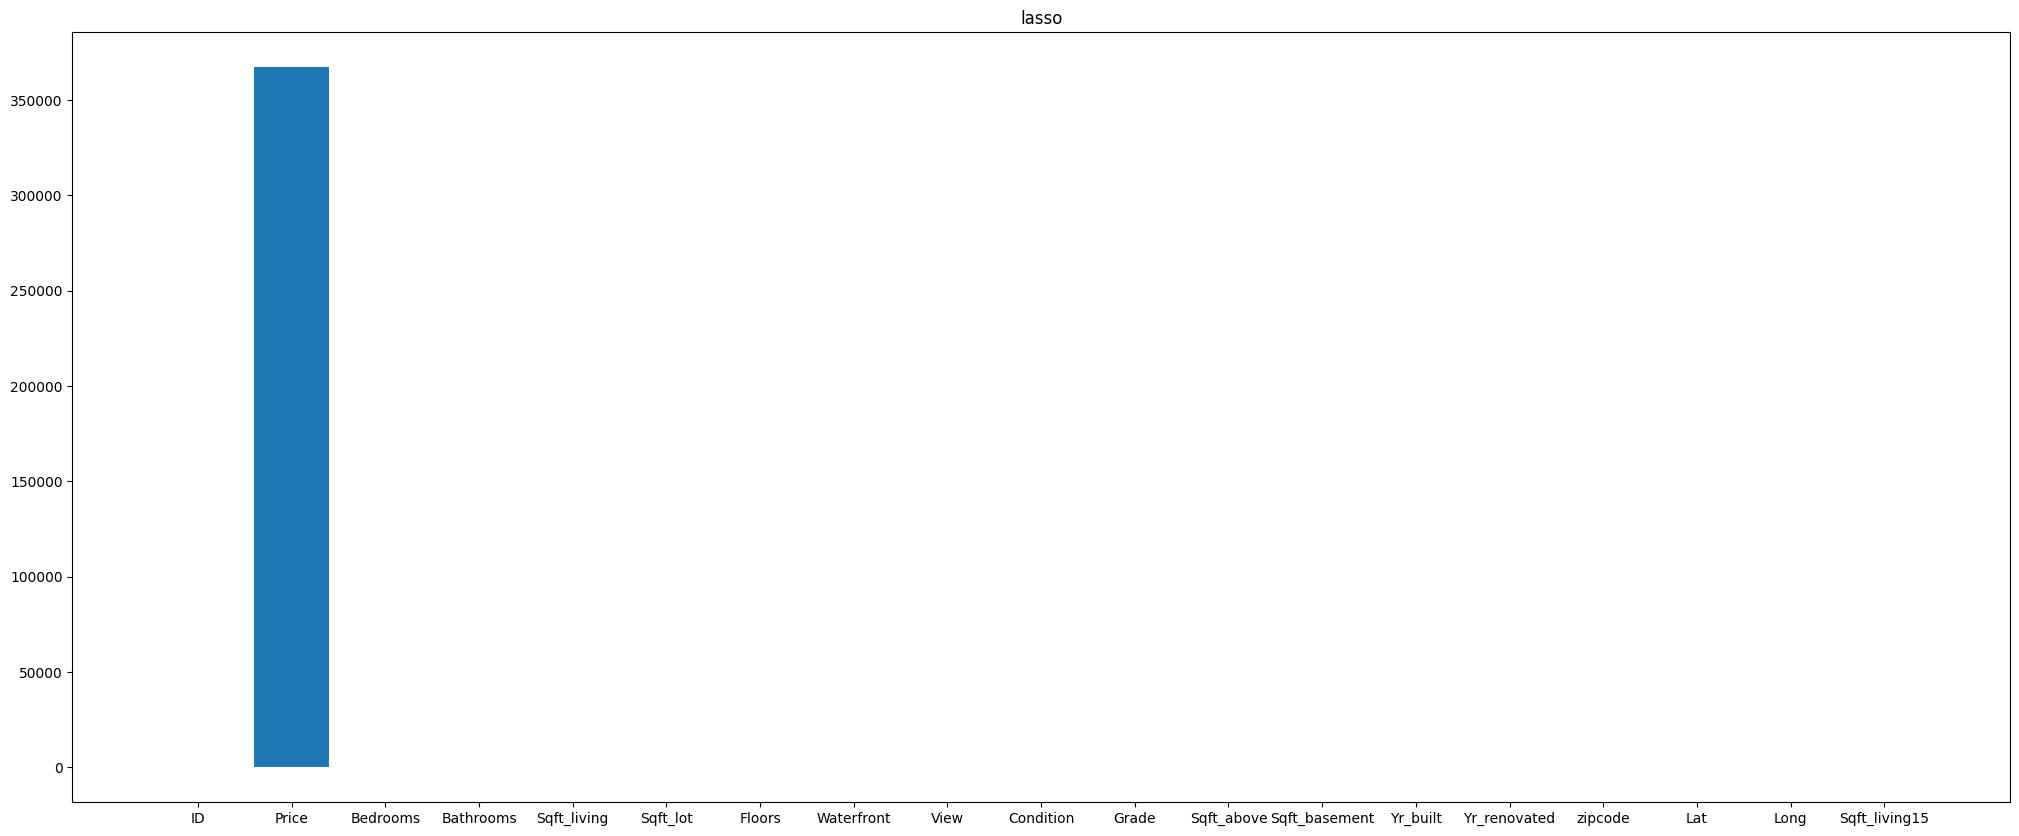

In [20]:
plt.figure(figsize=(25,10))
plt.bar(x.columns, la.coef_)
plt.title('lasso')

ridge

In [21]:
ri= Ridge(alpha=10)
ri.fit(x_train,y_train)
ri.score(x_test, y_test)*100

99.9998902800334

Text(0.5, 1.0, 'lasso')

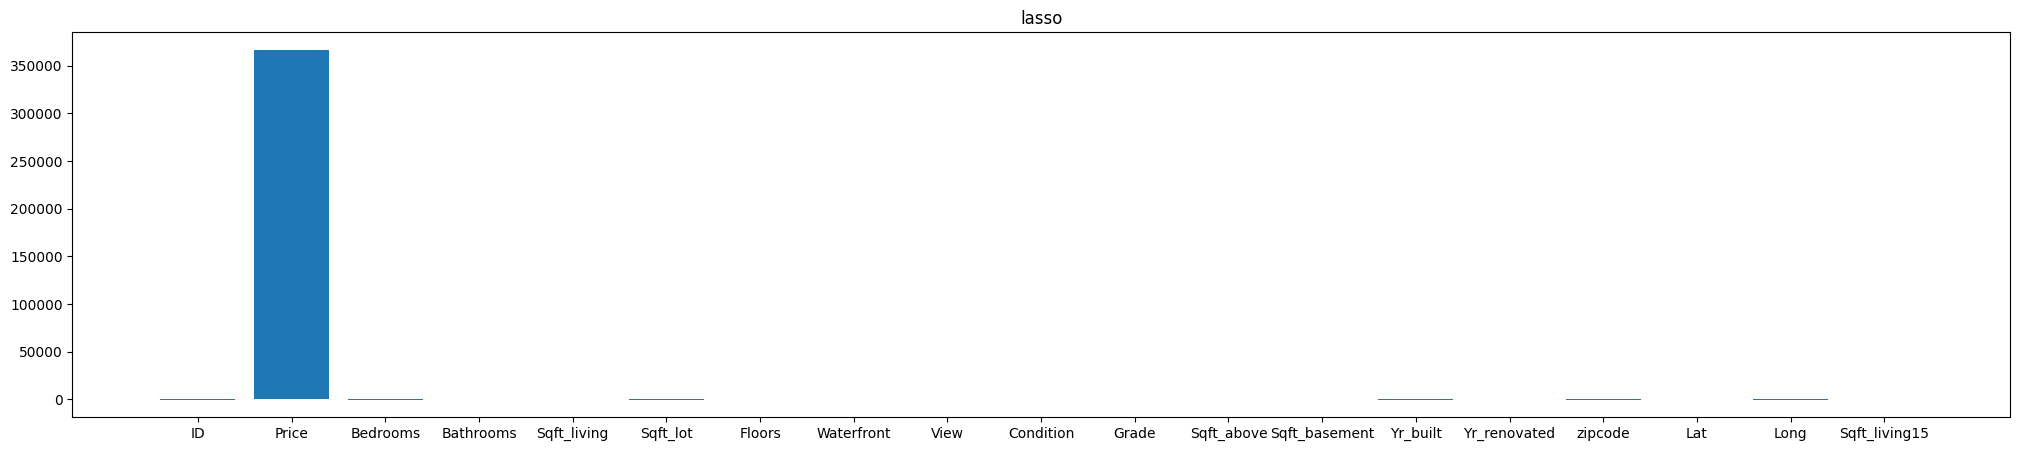

In [22]:
plt.figure(figsize=(25,5))
plt.bar(x.columns, ri.coef_)
plt.title('lasso')

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [24]:

# Mean Squared Error
print("MSE:", mean_squared_error(y_test, lr.predict(x_test)))

# Mean Absolute Error
print("MAE:", mean_absolute_error(y_test, lr.predict(x_test)))

# Root Mean Squared Error
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))

MSE: 2.4118670465533135e-19
MAE: 3.386896836958962e-10
RMSE: 4.911076304185584e-10


In [25]:


# Mean Squared Error
print("MSE:", mean_squared_error(y_test, la.predict(x_test)))

# Mean Absolute Error
print("MAE:", mean_absolute_error(y_test, la.predict(x_test)))

# Root Mean Squared Error
print("RMSE:", np.sqrt(mean_squared_error(y_test, la.predict(x_test))))

MSE: 529.893648449835
MAE: 18.52659698730032
RMSE: 23.019418942489295


In [26]:

# Mean Squared Error
print("MSE:", mean_squared_error(y_test, ri.predict(x_test)))

# Mean Absolute Error
print("MAE:", mean_absolute_error(y_test, ri.predict(x_test)))

# Root Mean Squared Error
print("RMSE:", np.sqrt(mean_squared_error(y_test, ri.predict(x_test))))

MSE: 134462.46110126024
MAE: 239.06959833698863
RMSE: 366.691234012023


In [27]:
df= pd.DataFrame({"col_name":x.columns, "LinearRegression":lr.coef_, "Lasso":la.coef_,"Ridge":ri.coef_})
df

,col_name,LinearRegression,Lasso,Ridge
0,ID,-1.151729e-10,-0.218400,-7.224057
1,Price,3.673537e+05,367344.715126,366660.998389
2,Bedrooms,2.691782e-11,-0.000000,-64.901739
3,Bathrooms,-2.350172e-11,4.064419,54.875585
4,Sqft_living,1.254112e-10,8.003013,157.736105
5,Sqft_lot,2.319971e-11,0.041234,-6.524330
6,Floors,-1.079711e-11,11.898068,7.068500
7,Waterfront,2.173769e-11,2.867593,102.194366
8,View,-7.925698e-12,-5.449976,74.618412
9,Condition,6.371905e-11,-6.187705,31.972012
